# Basic Neural Net w/Keras 

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [3]:
train = pd.read_csv('./Data/train.csv',index_col=0)
test = pd.read_csv('./Data/test.csv',index_col=0)

## Get full columns and only use this data

In [4]:
cols = []
for col in train.columns:
    if train[col].count() == 1460:
        cols.append(col)

In [5]:
train = train[cols]
test = test[cols[:-1]]

## Create dummy columns for categorical variables

In [6]:
# Concat so that train and test have same number of columns since test is missing some values in a few columns
temp = pd.get_dummies(pd.concat([train,test],sort=False))
train = temp.iloc[:1460]
test = temp.iloc[1460:].drop(['SalePrice'],axis=1)

## Scale Data

In [7]:
from sklearn.preprocessing import MinMaxScaler

train_scaler = MinMaxScaler()
test_scaler = MinMaxScaler()
train = pd.DataFrame(train_scaler.fit_transform(train),columns=train.columns)
test = pd.DataFrame(test_scaler.fit_transform(test),columns=test.columns,index=np.arange(1461,2920))

## Split Train into feature and target columns

In [8]:
x = train.drop(['SalePrice'],axis=1)
y = train['SalePrice']

## Train Test Split on Train

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

##  Create Neural Net

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras

Using TensorFlow backend.


In [11]:
epochs = 100
batch_size = 32

model = Sequential()
model.add(Dense(100,activation='relu',input_dim=215))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='Adam',loss='mse',metrics=['mae'])

model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Train on 1022 samples, validate on 438 samples
Epoch 1/100
1022/1022 [==============================] - 1s 505us/step - loss: 0.0682 - mae: 0.2266 - val_loss: 0.0118 - val_mae: 0.0782
Epoch 2/100
1022/1022 [==============================] - 0s 115us/step - loss: 0.0243 - mae: 0.1186 - val_loss: 0.0078 - val_mae: 0.0645
Epoch 3/100
1022/1022 [==============================] - 0s 114us/step - loss: 0.0172 - mae: 0.1006 - val_loss: 0.0059 - val_mae: 0.0570
Epoch 4/100
1022/1022 [==============================] - 0s 108us/step - loss: 0.0131 - mae: 0.0879 - val_loss: 0.0049 - val_mae: 0.0521
Epoch 5/100
1022/1022 [==============================] - 0s 105us/step - loss: 0.0119 - mae: 0.0851 - val_loss: 0.0040 - val_mae: 0.0464
Epoch 6/100
1022/1022 [==============================] - 0s 116us/step - loss: 0.0103 - mae: 0.0775 - val_loss: 0.0037 - val_mae: 0.0445
Epoch 7/100
1022/1022 [==============================] - 0s 119us/step - loss: 0.0092 - mae: 0.0743 - val_loss: 0.0037 - val_mae: 0

1022/1022 [==============================] - 0s 116us/step - loss: 0.0032 - mae: 0.0426 - val_loss: 0.0040 - val_mae: 0.0295
Epoch 61/100
1022/1022 [==============================] - 0s 108us/step - loss: 0.0029 - mae: 0.0412 - val_loss: 0.0037 - val_mae: 0.0296
Epoch 62/100
1022/1022 [==============================] - 0s 105us/step - loss: 0.0028 - mae: 0.0406 - val_loss: 0.0039 - val_mae: 0.0334
Epoch 63/100
1022/1022 [==============================] - 0s 102us/step - loss: 0.0031 - mae: 0.0417 - val_loss: 0.0038 - val_mae: 0.0305
Epoch 64/100
1022/1022 [==============================] - 0s 105us/step - loss: 0.0028 - mae: 0.0400 - val_loss: 0.0037 - val_mae: 0.0281
Epoch 65/100
1022/1022 [==============================] - 0s 103us/step - loss: 0.0027 - mae: 0.0399 - val_loss: 0.0039 - val_mae: 0.0299
Epoch 66/100
1022/1022 [==============================] - 0s 105us/step - loss: 0.0029 - mae: 0.0404 - val_loss: 0.0038 - val_mae: 0.0286
Epoch 67/100
1022/1022 [=======================

## Evaluate on Test portion of the Train data

In [12]:
model.evaluate(x_test,y_test)

438/438 [==============================] - 0s 43us/step


[0.004253175420065721, 0.029997803270816803]

## Visualize the accuracy

In [13]:
pred = model.predict(x_test)

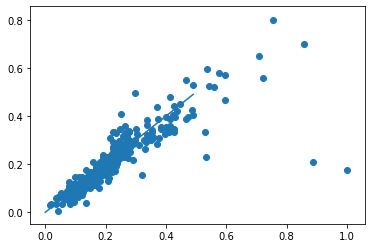

In [14]:
plt.scatter(pred,y_test)
plt.plot(np.arange(0,0.5,0.01),np.arange(0,0.5,0.01))

## Make predictions for Test

In [15]:
pred = model.predict(test)
pred = [x[0] for x in pred]

## Reverse Scaling to get real numbers

In [18]:
submission = train.iloc[1460:]
submission['SalePrice'] = pred
pred = pd.DataFrame(train_scaler.inverse_transform(submission),columns=submission.columns)['SalePrice']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Create submission file

In [19]:
submission = pd.DataFrame(list(enumerate(pred)),columns=['Id','SalePrice']).set_index('Id')
submission.index += 1460+1
submission.fillna(value=submission['SalePrice'].mean(),inplace=True)
submission.to_csv('./submission.csv')

# Save model if wanted

In [ ]:
model.save('./Models/Submission_3.h5')